### libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

#evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Dataset

In [2]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

In [3]:
bio1_phase0 = df[(df['bio_id'] == 1) & (df['phase_test'] == 0)].reset_index()
bio1_phase1 = df[(df['bio_id'] == 1) & (df['phase_test'] == 1)]
bio1_phase2 = df[(df['bio_id'] == 1) & (df['phase_test'] == 2)]
bio1_phase3 = df[(df['bio_id'] == 1) & (df['phase_test'] == 3)]
bio2_phase0 = df[(df['bio_id'] == 2) & (df['phase_test'] == 0)]
bio2_phase1 = df[(df['bio_id'] == 2) & (df['phase_test'] == 1)]
bio2_phase2 = df[(df['bio_id'] == 2) & (df['phase_test'] == 2)]
bio2_phase3 = df[(df['bio_id'] == 2) & (df['phase_test'] == 3)]

In [4]:
sections = [bio2_phase3, bio2_phase2, bio2_phase1, bio2_phase0, bio1_phase3, bio1_phase2, bio1_phase1, bio1_phase0]

sections_list = ["bio2_phase3", "bio2_phase2", "bio2_phase1", "bio2_phase0", "bio1_phase3", "bio1_phase2", "bio1_phase1", "bio1_phase0"]

In [5]:
df.shape

(44003, 13)

In [16]:
data = df.drop(columns = ['date', 'hour'], axis=1)

In [17]:
X = data.drop("dm3_gas",axis=1)

y = data['dm3_gas']

In [18]:
X_train, X_test,y_train,  y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((35202, 10), (8801, 10), (35202,), (8801,))

In [19]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test))

#filling missing values
X_train_scaled_filled = X_train_scaled.fillna(0)
X_test_scaled_filled = X_test_scaled.fillna(0)

In [20]:
X_train_scaled_filled.shape

(35202, 10)

In [21]:
rfr = RandomForestRegressor()
rfr_model = rfr.fit(X_train_scaled_filled, y_train)
print(mean_absolute_error(rfr_model.predict(X_test_scaled_filled), y_test))

0.0010771031785611848


mse of 0.001 is quite good

In [22]:
#predictng on the large dataset "train dataset"
preds = rfr_model.predict(X_train_scaled_filled)

In [23]:
modelled = pd.DataFrame({'preds' : preds, 
                        'Hour' : X_train.Hour,
                        'dm3' : y_train}
                )

In [24]:
modelled_group = modelled.groupby('Hour').mean().reset_index()

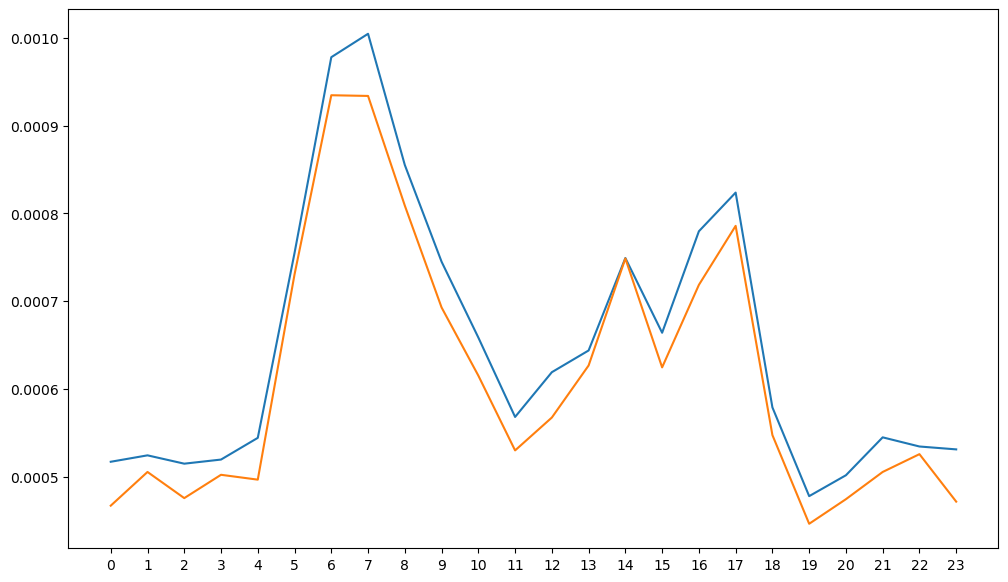

In [25]:
#Visualization
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(modelled_group.Hour, modelled_group.preds)
ax.plot(modelled_group.Hour, modelled_group.dm3)
ax.set_xticks(np.arange(0, 24, step=1))
plt.show()